In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Esercizio 1
Nel file `covid-19_gen1.txt` è presente l'RNA di un virus SARS-COV-2. L'RNA è una sequenza in cui si alternano 4 simboli (detti nucleotidi): A, T, C, G.
L'RNA del  virus SARS-COV-2 contiene 29903 nucleotidi. Leggi il file e crea un array di Numpy contenente i 29903 elementi, uno per ogni nucleotide secondo l'ordine contenuto nel file.

Utilizza Numpy per:
1. calcolare la frequenza assoluta di ogni nucleotide;
2. calcolare la frequenza assoluta della sequenza A,T,G;
4. sapendo che la sequenza A,T,G,T,T,T,G,T,T,T,T,T sta all'inzio del segmento di RNA che codifica la proteina spike, individuare se la proteina spike è presente nell'RNA: in caso affermativo ottenere la posizione iniziale della proteina spike all'interno dell'array. *SUGGERIMENTO*: costruisci la matrice contenente tutte le possibili sequenze di 12 nucleotidi, nella quale ogni riga rappresenta una sequenza consecutiva di 12 nucleotidi.

In [15]:
file = open("./covid-19_gen1.txt", "r")
stringa = ""

for line in file.readlines():
    stringa += line[: -1]

file.close()

rna = np.array([n for n in stringa])
aligning_seq = np.array([n for n in spike_seq])

In [6]:
# punto 1
np.count_nonzero(rna == "T") # per ogni lettera

9594

In [8]:
# punto 2
rna_0 = rna[: -2]
rna_1 = np.roll(rna, 1)[: -2]
rna_2 = np.roll(rna, 2)[: -2]

np.count_nonzero(np.logical_and(rna_0 == "A", np.logical_and(rna_1 == "T", rna_2 == "G")))

469

In [16]:
# punto 3
spike_seq = "ATGTTTGTTTTT"

temp = [(i + j) for i in range(0, len(rna) - 11) for j in range(0, 12)]

seq_12 = rna[temp].reshape((-1, 12))

In [17]:
np.all(seq_12 == aligning_seq, axis = 1)

array([False, False, False, ..., False, False, False])

## Esercizio 2
Il file `prezzi.cvs` contiene le serie storiche mensili dei prezzi di alcuni generi alimentari dal Settembre 2011 a Dicembre 2016. Caricare all'interno di opportuni array di Numpy soltanto le serie dei prezzi utili a rispondere alle domande seguenti.

1. Per il periodo Settembre 2011 - Dicembre 2016 calcola il prezzo di una spesa composta da:
    - 5kg di Farina di frumento
    - 1 l di Latte fresco
    - 1 kg di Caffè tostato
    - 0.5 kg di Parmigiano Reggiano
2. Per la spesa del punto 1 calcola se ci sono dei minimi locali nel prezzo e se si quando (anno, mese).

3. Traccia un grafico che mostri l'andamento del prezzo del Caffè tostato (gr. 1000).

4. Calcola un array con le variazioni di prezzo mensile per il Caffè tostato (gr. 1000).

5. Calcola un array con le variazioni di prezzo mensile per il Burro (gr. 1000).

6. Traccia un grafico a dispersione che mostri la variazione di prezzo mensile per il Caffè tostato (gr. 1000) rispetto a quella del Burro (gr. 1000).

In [2]:
data = pd.read_csv("./prezzi.csv", sep = ";") # data è un dataframe
data

,anno,mese,Acqua minerale (cl. 900),Birra nazionale (cl. 100),Biscotti frollini (gr. 1000),Burro (gr. 1000),Caffè tostato (gr. 1000),Carne fresca bovino adulto. primo taglio (gr. 1000),Carne fresca suina con osso (gr. 1000),Farina di frumento (gr. 1000),...,Prosciutto cotto (gr. 1000),Prosciutto crudo (gr. 1000),Riso (gr. 1000),Stracchino o crescenza (gr. 1000),Succo di frutta (cl. 100),Tonno in olio d'oliva (gr. 1000),Uova di gallina (pz. 6),Vino da tavola (cl. 100),Yogurt (gr. 125),Zucchero (gr. 1000)
0,2011,Settembre,2.54,1.87,4.30,10.03,13.12,16.72,7.41,0.81,...,25.13,28.77,2.49,11.54,1.60,12.73,1.59,3.24,0.56,1.16
1,2011,Ottobre,2.54,1.87,4.30,9.95,13.06,16.72,7.43,0.82,...,25.13,28.82,2.49,11.66,1.60,12.70,1.58,3.25,0.56,1.16
2,2011,Novembre,2.54,1.88,4.73,9.93,13.42,16.72,7.49,0.81,...,25.02,28.90,2.49,11.36,1.59,12.72,1.57,3.33,0.55,1.16
3,2011,Dicembre,2.50,1.88,4.73,10.12,13.65,16.78,7.53,0.80,...,25.02,28.52,2.48,11.15,1.59,13.03,1.57,3.43,0.55,1.16
4,2012,Gennaio,2.50,1.89,4.73,10.19,13.65,16.83,7.58,0.80,...,25.02,28.52,2.49,11.18,1.59,13.27,1.56,3.36,0.55,1.16
5,2012,Febbraio,2.48,1.90,4.78,10.17,13.70,16.88,7.32,0.81,...,25.08,28.73,2.50,11.34,1.59,13.83,1.56,3.22,0.55,1.16
6,2012,Marzo,2.49,1.91,4.53,10.32,13.78,16.92,7.36,0.82,...,25.08,28.73,2.49,11.34,1.59,13.97,1.58,3.35,0.56,1.15
7,2012,Aprile,2.49,1.90,4.53,10.20,13.81,16.96,7.36,0.81,...,25.17,28.76,2.47,11.30,1.60,14.09,1.64,3.36,0.55,1.15
8,2012,Maggio,2.52,1.90,4.56,10.26,13.91,16.97,7.30,0.81,...,25.17,28.92,2.48,11.61,1.59,14.07,1.64,3.37,0.56,1.15
9,2012,Giugno,2.52,1.92,4.57,10.38,14.00,16.97,7.16,0.82,...,25.17,28.98,2.41,11.49,1.60,14.28,1.64,3.38,0.56,1.15


In [3]:
arr_dtanno = data["anno"].values
arr_dtmese = data["mese"].values
arr_farina = data["Farina di frumento (gr. 1000)"].values
arr_latte = data["Latte fresco (cl. 100)"].values
arr_caffe = data["Caffè tostato (gr. 1000)"].values
arr_parmigiano = data["Parmigiano Reggiano (gr. 1000)"].values
arr_burro = data["Burro (gr. 1000)"].values

In [4]:
# PUNTO 1
spesa = (arr_farina * 5) + (arr_latte * 10) + arr_caffe + (arr_parmigiano / 2)
arr_spesa = np.array(spesa)
arr_spesa

array([44.39 , 44.39 , 43.64 , 43.47 , 43.485, 43.47 , 43.295, 43.225,
       43.64 , 44.15 , 43.81 , 43.82 , 43.76 , 43.7  , 43.47 , 43.485,
       43.47 , 43.295, 43.225, 43.64 , 44.15 , 43.81 , 43.82 , 43.76 ,
       43.7  , 43.81 , 43.7  , 44.64 , 44.38 , 44.57 , 44.71 , 44.37 ,
       44.275, 44.33 , 44.   , 44.115, 44.345, 44.315, 44.345, 44.385,
       44.25 , 43.73 , 43.645, 43.665, 43.66 , 43.87 , 44.195, 42.245,
       42.215, 42.255, 41.39 , 41.29 , 41.32 , 41.31 , 40.745, 41.16 ,
       41.23 , 40.915, 40.885])

In [5]:
# PUNTO 2
arr_prec = np.roll(arr_spesa, -1) [1: -1]
arr_succ = np.roll(arr_spesa, 1) [1: -1]
spesa = arr_spesa [1: -1]
arr_anno = arr_dtanno [1: -1]
arr_mese = arr_dtmese [1: -1]

print(arr_anno[np.logical_and(arr_prec > spesa, arr_succ < spesa)])
print(arr_mese[np.logical_and(arr_prec > spesa, arr_succ < spesa)])

[2012 2013 2014 2015 2015 2015 2016]
['Maggio' 'Maggio' 'Marzo' 'Gennaio' 'Aprile' 'Novembre' 'Settembre']


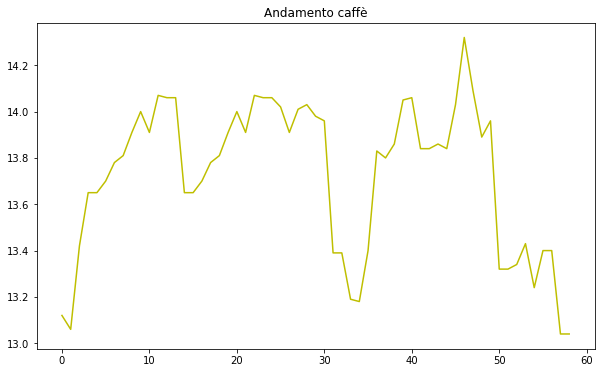

In [6]:
# PUNTO 3
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(arr_caffe, "y")
ax.set_title("Andamento caffè")
plt.show()

In [7]:
# PUNTO 4
var_mens_caffe = np.roll(arr_caffe, 1) - arr_caffe
arr_mens_caffe = np.array(var_mens_caffe)
arr_mens_caffe

array([-0.08,  0.06, -0.36, -0.23,  0.  , -0.05, -0.08, -0.03, -0.1 ,
       -0.09,  0.09, -0.16,  0.01,  0.  ,  0.41,  0.  , -0.05, -0.08,
       -0.03, -0.1 , -0.09,  0.09, -0.16,  0.01,  0.  ,  0.04,  0.11,
       -0.1 , -0.02,  0.05,  0.02,  0.57,  0.  ,  0.2 ,  0.01, -0.22,
       -0.43,  0.03, -0.06, -0.19, -0.01,  0.22,  0.  , -0.02,  0.02,
       -0.19, -0.29,  0.23,  0.2 , -0.07,  0.64,  0.  , -0.02, -0.09,
        0.19, -0.16,  0.  ,  0.36,  0.  ])

In [8]:
# PUNTO 5
var_mens_burro = np.roll(arr_burro, 1) - arr_burro
arr_mens_burro = np.array(var_mens_burro)
arr_mens_burro

array([ 0.04,  0.08,  0.02, -0.19, -0.07,  0.02, -0.15,  0.12, -0.06,
       -0.12, -0.13, -0.04, -0.11, -0.02,  0.56, -0.07,  0.02, -0.15,
        0.12, -0.06, -0.12, -0.13, -0.04, -0.11, -0.02,  0.09, -0.08,
       -0.05, -0.34, -0.15, -0.13,  0.  ,  0.  ,  0.16, -0.06,  0.36,
        0.2 , -0.19, -0.04,  0.  ,  0.1 ,  0.07,  0.  , -0.11, -0.01,
       -0.32,  0.31,  0.22, -0.28,  0.11,  0.36, -0.08, -0.01,  0.11,
        0.33, -0.12,  0.11, -0.03,  0.08])

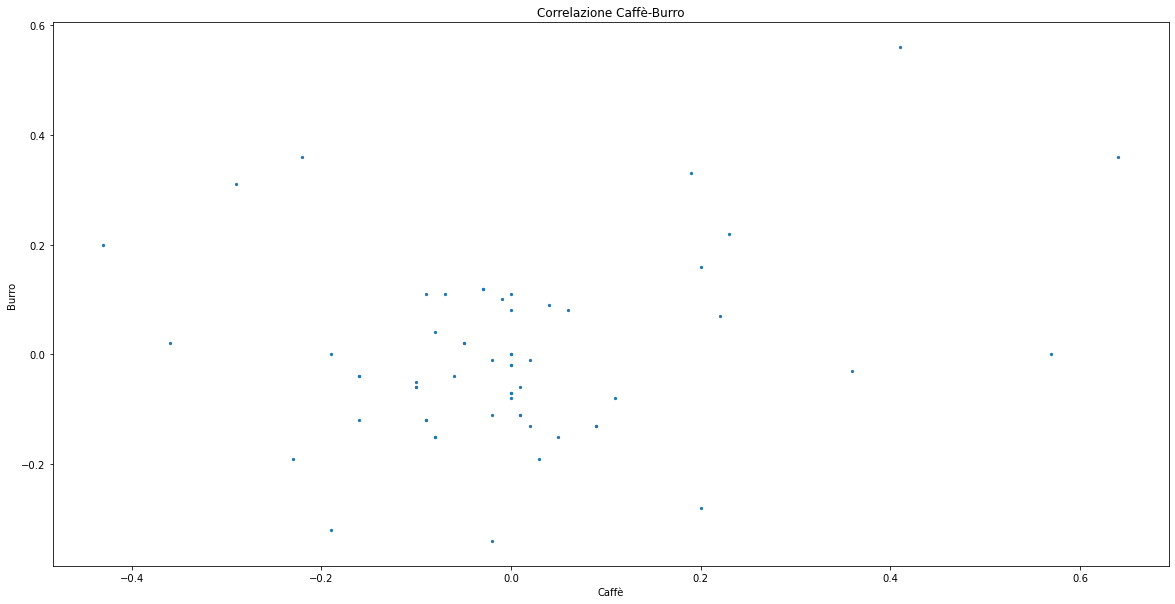

In [9]:
# PUNTO 6
fig, ax = plt.subplots(figsize = (20, 10))
ax.scatter(arr_mens_caffe, arr_mens_burro, s = 5.0)
ax.set_title("Correlazione Caffè-Burro")
ax.set_xlabel("Caffè")
ax.set_ylabel("Burro")

plt.show()

## Esercizio 3
L'array `array_punti` è un array di Numpy come quello sottostante, contenente quattro coppie di coordinate spaziali intere scelte a caso, che rappresentano quattro punti nel piano. Essi sono i quattro vertici di una figura geometrica piana, letti in verso anti-orario. Facendo uso di Numpy: [suggerimento: usare funzione unique()]
1. crea una funzione che verifichi se la figura geometrica è un quadrilatero, un triangolo, un segmento oppure un punto;
2. crea una funzione che calcoli il perimetro della figura.

In [19]:
array_punti= np.random.randint(0.,5,(4,2))
array_punti

array([[1, 2],
       [1, 1],
       [0, 1],
       [3, 2]])

In [20]:
# punto 1
def forma(num):
    if num == 1:
        return "punto"
    elif num == 2:
        return "segmento"
    elif num == 3:
        return "Triangolo"
    else:
        return "quadrilatero"

In [21]:
risultati = len(np.unique(array_punti, axis = 0))
print(f"Questi punti formano un {forma(risultati)}")

Questi punti formano un quadrilatero


In [33]:
# punto 2
sommone = np.sum((array_punti - np.roll(array_punti, 1, axis = 0)) ** 2, axis = 1)
sommone

array([ 4,  1,  1, 10], dtype=int32)

In [32]:
np.sum(np.sqrt(sommone))

7.16227766016838

## Esercizio 4
Usa Numpy per calcolare una approssimazione dell'integrale definito della funzione f(x) = exp(-x^2) da 0 a 1. Suddividi l'intervallo [0,1] in n sotto-intervalli e per ogni sotto-intervallo approssima l'area sottesa dalla funzione con l'area del corrispondente rettangolo.
[Suggerimento: usare np.linespace()]
![rettangoli](rettangolo.png)
Calcola il risultato per n=10, 100, 10000, 100000.